In [1]:
# Data wrangling 
import pandas as pd 

# Array math
import numpy as np 

# Ploting 
import seaborn as sns
import matplotlib.pyplot as plt

# List iteration tracking
from tqdm import tqdm

# Importing the custom written class 
from DecisionTree import Node 

# Importing the custom regression tree 
from RegressionDecisionTree import NodeRegression

# Importing the scikit-learn tree implementation
from sklearn.tree import DecisionTreeClassifier, export_text , DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix

# Inspecting functions
import inspect

# Time tracking
import time

In [2]:
# Loading data
d = pd.read_csv('data.csv')

In [3]:
d.isna().sum() # finds the sum of colomuns with missing val
d=d.dropna(axis=1) # drops the last col with empty val
d.shape

(569, 32)

In [4]:
d.head(-10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,...,13.89,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969


In [5]:
labelencoder_Y= LabelEncoder()
d.iloc[:,1]=labelencoder_Y.fit_transform(d.iloc[:,1].values)
d.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
d.shape

(569, 32)

In [8]:
d.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
d.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [10]:
# let's plot pair plot to visualise the attributes all at once
#sns.pairplot(data=d, hue = 'diagnosis')

In [11]:
# correlation matrix
#plt.figure(figsize=(12,10))
#sns.heatmap(d.corr(),annot=True,cmap="magma",fmt='.2f')

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = d.copy()
X = data.iloc[:,2:31]  #independent columns
y = data.iloc[:,1]    #target column 
#apply SelectKBest class to extract top best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

              Specs          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508
26  concavity_worst      39.516915
10        radius_se      34.675247


Lets say we want to create a classifier whether a person have heart disease or not using two variables: trestbps and oldpeak. We want to create a simple decision tree to accomplish this task. 

In [13]:
dd = d[['diagnosis', 'area_mean', 'area_worst']].copy()

# Droping missing entries
dd.dropna(inplace=True)

In [14]:
print(f"Number of observations: {dd.shape[0]}")

Number of observations: 569


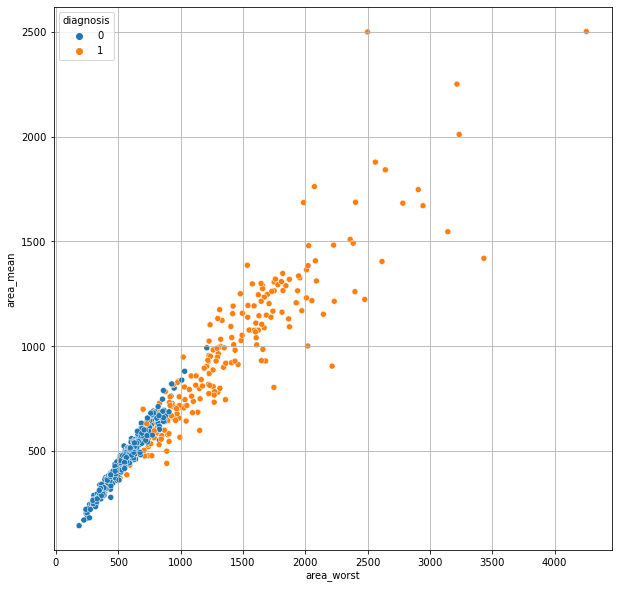

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(y='area_mean', x='area_worst', data=dd, hue='diagnosis')
plt.grid()
plt.show()

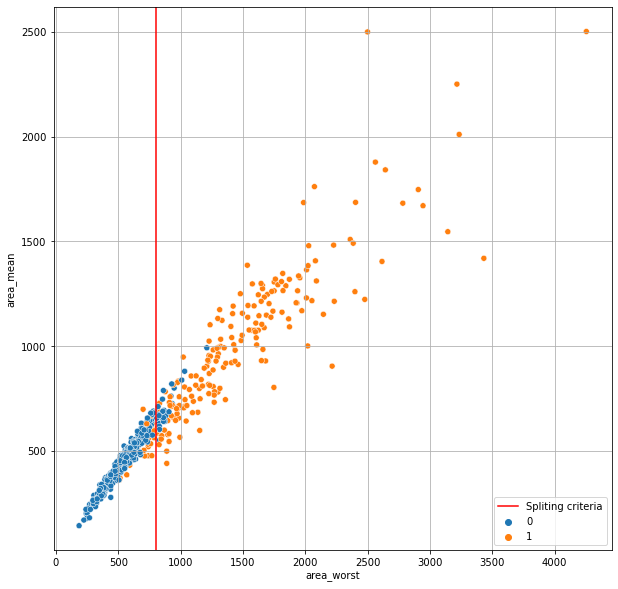

In [16]:
# Define the split value 
area_worst_split = 800

# Ploting the original plot
plt.figure(figsize=(10, 10))
sns.scatterplot(y='area_mean', x='area_worst', data=dd, hue='diagnosis')
plt.grid()

# Adding the vertical line
plt.axvline(area_worst_split, label='Spliting criteria', color='red')
plt.legend()
plt.show()

In [17]:
# Getting the left and right datasets
left = dd[dd['area_worst']<=area_worst_split]
right = dd[dd['area_worst']>area_worst_split]

We made a decision to split the data into two parts based on the visual ques from the scatterplot. Some statistics:

In [18]:
print(f"Observations to the left of criteria: {left.shape[0]}")
print(f"Observations to the right of criteria: {right.shape[0]}")

Observations to the left of criteria: 348
Observations to the right of criteria: 221


In [19]:
left.groupby('diagnosis', as_index=False).size()

,diagnosis,size
0,0,324
1,1,24


In [20]:
right.groupby('diagnosis', as_index=False).size()

,diagnosis,size
0,0,33
1,1,188


There are observations from both of the classes in the nodes. Thus, each of the nodes are are **impure**. But how impure? To measure impurity we use the **GINI** impurity coefficient. 

# GINI impurity definition 

The GINI impurity index is the default spliting criteria when building decision trees. 

The formal definition for GINI impurity is as follows: 
    
*Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.*

The definition is not very intuitive so lets bring some clarity. 

Suppose we have two classes in the dataset:

$$k_{1}, k_{2}$$. 

Each of the classes have $n_{1}$ and $n_{2}$ observations.

The probability of observing something from one of the $k$ classes is: 

$$p(i) = P(x_{i} \in k_{i}) = \dfrac{n_{i}}{n_{1} + n_{2}},  i \in \{1, 2\}$$

The GINI impurity of such a system is calculated with the following formula:
    
$$G = 1 - \Sigma_{i=1}^{2}p(i)^{2}$$

The function for calculating the impurity is in the **Node** class:

In [21]:
print(inspect.getsource(Node.GINI_impurity))

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int) -> float:
        """
        Given the observations of a binary class calculate the GINI impurity
        """
        # Ensuring the correct types
        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        # Getting the total observations
        n = y1_count + y2_count
        
        # If n is 0 then we return the lowest possible gini impurity
        if n == 0:
            return 0.0

        # Getting the probability to see each of the classes
        p1 = y1_count / n
        p2 = y2_count / n
        
        # Calculating GINI 
        gini = 1 - (p1 ** 2 + p2 ** 2)
        
        # Returning the gini impurity
        return gini



In [22]:
# Simulating some data
n = 1000

shares_y1 = [
    0, 
    0.1,
    0.2,
    0.3,
    0.4,
    0.5, 
    0.6,
    0.7,
    0.8,
    0.9,
    1
] 

y1_counts = [x * n for x in shares_y1]
y2_counts = [n - x for x in y1_counts]

y = list(zip(y1_counts, y2_counts))

In [23]:
y

[(0, 1000),
 (100.0, 900.0),
 (200.0, 800.0),
 (300.0, 700.0),
 (400.0, 600.0),
 (500.0, 500.0),
 (600.0, 400.0),
 (700.0, 300.0),
 (800.0, 200.0),
 (900.0, 100.0),
 (1000, 0)]

In [24]:
# Getting the GINI impurities for such data
ginis = [Node.GINI_impurity(x[0], x[1]) for x in y]

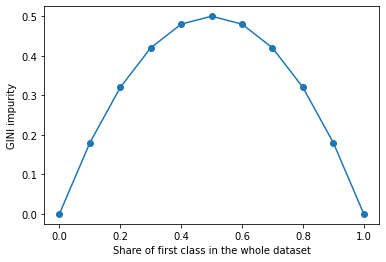

In [25]:
plt.plot(shares_y1, ginis, '-o')
plt.xlabel("Share of first class in the whole dataset")
plt.ylabel("GINI impurity")
plt.show()

The above graph shows a very important relationship. The upper bound of the GINI impurity index is 0.5. It occurs when there is an equal number of observations of each class in the dataset. This is the **worst** case in terms of GINI impurity.

At the edges of graph, we get that impurity is 0. This occurs when there is only one class in the data. This is the **best** situation. 

# GINI impurity of a split 

Going back to the example with the heart dataset, we have two datasets resulting from the chosen split. Each of the datasets have different GINI impurity indexes. 

In [26]:
left_counts = left.groupby("diagnosis").size().values.tolist()
right_counts = right.groupby("diagnosis").size().values.tolist()

gini_left = Node.GINI_impurity(left_counts[0], left_counts[1])
gini_right = Node.GINI_impurity(right_counts[0], right_counts[1])

In [27]:
print(f"Gini impurity of the left node: {gini_left}")
print(f"Gini impurity of the right node: {gini_right}")
""""
gini_left = Node.GINI_impurity(y0_left, y1_left)
gini_right =Node.GINI_impurity(y0_right, y1_right)
# Getting the obs count from the left and the right data splits

n_left = y0_left + y1_left
n_right = y0_right + y1_right
"""

Gini impurity of the left node: 0.1284185493460166
Gini impurity of the right node: 0.25404885239859953


'"\ngini_left = Node.GINI_impurity(y0_left, y1_left)\ngini_right =Node.GINI_impurity(y0_right, y1_right)\n# Getting the obs count from the left and the right data splits\n\nn_left = y0_left + y1_left\nn_right = y0_right + y1_right\n'

The final GINI impurity index is calculated using the weighted average based on the observation sizes in each of the datasets.

In [28]:
w1 = left.shape[0]/ (left.shape[0] + right.shape[0]) 
w2 = right.shape[0] / (left.shape[0] + right.shape[0]) 

In [29]:
gini_final = w1 * gini_left + w2 * gini_right

In [30]:
print(f"Final gini impurity: {gini_final}")

Final gini impurity: 0.1772134473681973


# GINI gain

The last metric used in deciding where to split the data is the GINI gain metric. Its calculated by the difference of non splited GINI of the dataset and the GINI of the selected split. 

$$GINI gain = \Delta Gini = Gini_{parent} - (Gini_{left} \dfrac{n_{left}}{n_{right} + n_{left}} + Gini_{right} \dfrac{n_{right}}{n_{right} + n_{left}} )$$

In [31]:
def GINI_impurity_df(df:pd.DataFrame, target):
    """
    Function to calculate the resulting GINI impurity of a split
    """
    # Getting the counts and ginis
    counts = df.groupby(target).size().values.tolist()

    gini = Node.GINI_impurity(counts[0], counts[1])
    
    return gini

In [32]:
gini_orig = GINI_impurity_df(dd, 'diagnosis')

In [33]:
print(f"Gini non-splited: {gini_orig}")
print(f"Gini with the proposed split: {gini_final}")
print(f"Gini gain: {gini_orig - gini_final}")

Gini non-splited: 0.4675300607546925
Gini with the proposed split: 0.1772134473681973
Gini gain: 0.29031661338649517


At each split decision, we chose that split that has the highest GINI gain. If the GINI gain is non positive, we do not perform the split.

# Spliting on numeric variables 


When deciding where to split a numeric feature, we first sort all the values, get the means between neighbouring values and calculate the GINI gains with each of the means.

The full code to get the best split:

In [34]:
print(inspect.getsource(Node.ma))

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window



In [35]:
print(inspect.getsource(Node.best_split))

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input 
        GINI_base = self.get_GINI()

        # Finding which split yields the best GINI gain 
        max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Spliting the dataset 
                left_counts = Counter(Xdf[Xdf[feature]<value]['Y'])
                right_counts = Counter(Xdf[Xdf[feature]>=value]['Y'])

                # Ge

# Growing the full tree

In [36]:
# Dropping missing values
dtree = d[['diagnosis', 'area_mean', 'area_worst']].dropna().copy()

# Defining the X and Y matrices
Y = dtree['diagnosis'].values
X = dtree[['area_mean', 'area_worst']]
# Saving the feature list 
features = list(X.columns)

In [37]:
# Setting the available hyper parameters of a tree
hp = {
    'min_samples_split': 50,
    'max_depth': 3
    
}

In [38]:
# Initiating the Node
root = Node(Y, X, **hp)
# Getting teh best split
root.grow_tree()


# Printing the tree information 
root.print_tree()

Root
   | GINI impurity of the node: 0.47
   | Class distribution in the node: {1: 212, 0: 357}
   | Predicted class: 0
|-------- Split rule: area_worst <= 884.55
           | GINI impurity of the node: 0.17
           | Class distribution in the node: {1: 37, 0: 349}
           | Predicted class: 0
|---------------- Split rule: area_worst <= 739.2
                   | GINI impurity of the node: 0.07
                   | Class distribution in the node: {1: 11, 0: 308}
                   | Predicted class: 0
|------------------------ Split rule: area_mean <= 677.95
                           | GINI impurity of the node: 0.06
                           | Class distribution in the node: {1: 10, 0: 308}
                           | Predicted class: 0
|------------------------ Split rule: area_mean > 677.95
                           | GINI impurity of the node: 0.0
                           | Class distribution in the node: {1: 1}
                           | Predicted class: 1
|---------

As it turns out, the best first split is the chol feature at value 300.  

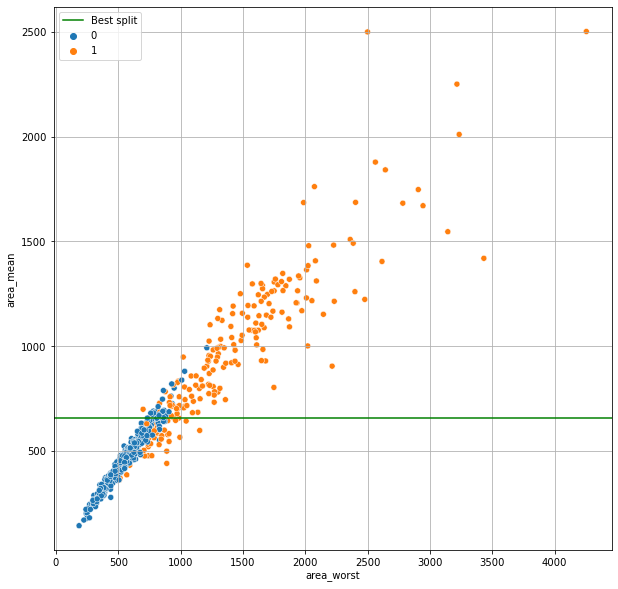

In [39]:
# Define the split value 
area_worst = 0.1

# Ploting the original plot
plt.figure(figsize=(10, 10))
sns.scatterplot(y='area_mean', x='area_worst', data=dd, hue='diagnosis')
plt.grid()

# Adding the split line
plt.axhline(657, label='Best split', color='green')
plt.legend()
plt.show()

# Scikit-learn comparison 

The go-to machine learning framework with python is the scikit-learn package https://scikit-learn.org/stable/index.html. 
    
The package has a decision tree creation implementation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier

Lets see how it compares to the custom tree creation that I have written.

In [40]:
custom_tree_start = time.time()

# Initiating the Node
root = Node(Y, X, **hp)

# Getting teh best split
root.grow_tree()

custom_tree_time = time.time() - custom_tree_start

In [41]:
scikit_tree_start = time.time()

# Using the ML package 
clf = DecisionTreeClassifier(**hp)
clf.fit(X, Y)

scikit_tree_time = time.time() - scikit_tree_start

In [42]:
print(f"Custom tree growing time: {custom_tree_time}s")
print(f"Scikit tree growing time: {scikit_tree_time}s")

Custom tree growing time: 2.854689121246338s
Scikit tree growing time: 0.003000497817993164s


As can be expected, the highly optimized scikit-learn solution works faster.

Both methods have a visualization: 

In [43]:
root.print_tree()

Root
   | GINI impurity of the node: 0.47
   | Class distribution in the node: {1: 212, 0: 357}
   | Predicted class: 0
|-------- Split rule: area_worst <= 884.55
           | GINI impurity of the node: 0.17
           | Class distribution in the node: {1: 37, 0: 349}
           | Predicted class: 0
|---------------- Split rule: area_worst <= 739.2
                   | GINI impurity of the node: 0.07
                   | Class distribution in the node: {1: 11, 0: 308}
                   | Predicted class: 0
|------------------------ Split rule: area_mean <= 677.95
                           | GINI impurity of the node: 0.06
                           | Class distribution in the node: {1: 10, 0: 308}
                           | Predicted class: 0
|------------------------ Split rule: area_mean > 677.95
                           | GINI impurity of the node: 0.0
                           | Class distribution in the node: {1: 1}
                           | Predicted class: 1
|---------

In [44]:
print(export_text(clf, feature_names=['oldpeak', 'thalach']))

|--- thalach <= 884.55
|   |--- thalach <= 739.20
|   |   |--- oldpeak <= 677.95
|   |   |   |--- class: 0
|   |   |--- oldpeak >  677.95
|   |   |   |--- class: 1
|   |--- thalach >  739.20
|   |   |--- oldpeak <= 610.95
|   |   |   |--- class: 1
|   |   |--- oldpeak >  610.95
|   |   |   |--- class: 0
|--- thalach >  884.55
|   |--- thalach <= 953.70
|   |   |--- class: 1
|   |--- thalach >  953.70
|   |   |--- thalach <= 1214.00
|   |   |   |--- class: 1
|   |   |--- thalach >  1214.00
|   |   |   |--- class: 1



# Predictions

In [45]:
# Result frame
results = X.copy()

# Predictions
results['scikit_learn'] = clf.predict(X[features])
results['custom_yhat'] = root.predict(X[features])

# Asserting that every prediction is the same 
np.all(results['scikit_learn'] == results['custom_yhat'])

True

In [46]:
accuracy_score(results['custom_yhat'], results['scikit_learn'])

1.0

# Implementation

In [47]:
custom_tree_start = time.time()

# Initiating the Node
root = NodeRegression(Y, X, **hp)

# Getting teh best split
root.grow_tree()

custom_tree_time = time.time() - custom_tree_start

In [48]:
scikit_tree_start = time.time()

# Using the ML package 
clf = DecisionTreeRegressor(**hp)
clf.fit(X, Y)

scikit_tree_time = time.time() - scikit_tree_start

In [49]:
print(f"Custom tree growing time: {custom_tree_time}s")
print(f"Scikit tree growing time: {scikit_tree_time}s")

Custom tree growing time: 2.7588741779327393s
Scikit tree growing time: 0.001999378204345703s


In [50]:
root.print_tree()

Root
   | MSE of the node: 0.23
   | Count of observations in node: 569
   | Prediction of node: 0.373
|-------- Split rule: area_worst <= 884.55
           | MSE of the node: 0.09
           | Count of observations in node: 386
           | Prediction of node: 0.096
|---------------- Split rule: area_worst <= 739.2
                   | MSE of the node: 0.03
                   | Count of observations in node: 319
                   | Prediction of node: 0.034
|------------------------ Split rule: area_mean <= 677.95
                           | MSE of the node: 0.03
                           | Count of observations in node: 318
                           | Prediction of node: 0.031
|------------------------ Split rule: area_mean > 677.95
                           | MSE of the node: 0.0
                           | Count of observations in node: 1
                           | Prediction of node: 1.0
|---------------- Split rule: area_worst > 739.2
                   | MSE of the node:

In [51]:
print(export_text(clf, feature_names=features))

|--- area_worst <= 884.55
|   |--- area_worst <= 739.20
|   |   |--- area_mean <= 677.95
|   |   |   |--- value: [0.03]
|   |   |--- area_mean >  677.95
|   |   |   |--- value: [1.00]
|   |--- area_worst >  739.20
|   |   |--- area_mean <= 610.95
|   |   |   |--- value: [0.78]
|   |   |--- area_mean >  610.95
|   |   |   |--- value: [0.18]
|--- area_worst >  884.55
|   |--- area_worst <= 953.70
|   |   |--- value: [0.74]
|   |--- area_worst >  953.70
|   |   |--- area_worst <= 1214.00
|   |   |   |--- value: [0.92]
|   |   |--- area_worst >  1214.00
|   |   |   |--- value: [1.00]



In [52]:
target = d['diagnosis']
d1 = d.copy()
d1 = d1.drop('diagnosis', axis =1)

In [62]:
X = d1

In [66]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [67]:
y = target

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (426, 31)
Testing split input-  (143, 31)


In [70]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')
y_pred = dtree.predict(X_test)

Decision Tree Classifier Created


In [71]:
def get_confusion_matrix(l1, l2):

    assert len(l1)==len(l2), "Two lists have different size."

    K = len(np.unique(l1))

    # create label-index value
    label_index = dict(zip(np.unique(l1), np.arange(K)))

    result = np.zeros((K, K))
    for i in range(len(l1)):
        result [label_index[l1[i]]][label_index[l2[i]]] += 1
    

    return result.astype(int)
x=get_confusion_matrix(y_test,y_pred)
print('-----------------')
print(x)
TP=x[0][0]
TP=int(TP)
FP=x[0][1]
FP=int(FP)
FN=x[1][0]
FN=int(FN)
TN=x[1][1]
TN=int(TN)
print(TP)
print(FP)
print(FN)
print(TN)
xax=TP+TN+FN+FP
Accuracy=(TP+TN)/(TP+TN+FN+FP)
recall= TP/(TP+FN)  # True positivetity rate
precision=TP/(TP+FP) #
f_1= 2*(recall*precision)/(precision+recall)
True_positivetity_rate= TP/(FN+TP)
True_Negitive_Rate=TN/(TN+FP)
False_Positive_rate= FP/(TN+FP)
mis_rate=(FP+FN)/xax # Error Rate
Prevalence=TP+FN/xax
print(f'Accuracy of the DT is :{Accuracy}')
print(f'recall of the DT is : {recall}')
print(f'precision of the DTis :{precision}')
print(f'F_1 Score of the DT is :{f_1}')
print("AUC")
print(f'False_Positive_rate of the DT is : {False_Positive_rate}')
print(f'True_Negitive_Rate  of the DT is: {True_Negitive_Rate}')
print(f'True positivetity rate of the DT is : {True_positivetity_rate}')
print(f'Misclassification Rate of the DT is : {mis_rate}')
print(f'Prevalence of the DT is : {Prevalence}')
print(xax)

-----------------
[[83  6]
 [ 3 51]]
83
6
3
51
Accuracy of the KNN is :0.9370629370629371
recall of the KNN is : 0.9651162790697675
precision of the KNNis :0.9325842696629213
F_1 Score of the KNN is :0.9485714285714285
AUC
False_Positive_rate of the KNN is : 0.10526315789473684
True_Negitive_Rate  of the KNN is: 0.8947368421052632
True positivetity rate of the KNN is : 0.9651162790697675
Misclassification Rate of the KNN is : 0.06293706293706294
Prevalence of the KNN is : 83.02097902097903
143


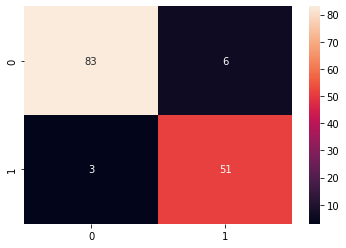

In [72]:
y=sns.heatmap(x ,annot=True)
figure = y.get_figure()
plt.show()
figure.savefig(f'confusionmatrix of Decision.png')